In [31]:
# Importing DataSet
from keras.datasets import mnist
data = mnist.load_data()

In [32]:
(x_train,y_train),(x_test,y_test) = data

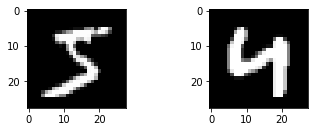

In [33]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[222],cmap=plt.get_cmap('gray'))

In [34]:
# Shape of Training Data
x_train[0].shape
# x_train.shape

(28, 28)

In [35]:
# Reshape the Training Data
x_train = x_train.reshape((x_train.shape[0],28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],28*28)).astype('float32')

In [36]:
# Normalizing values from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [37]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [38]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
# Define Model
model = Sequential()

# Add First Hidded Layer
model.add(Dense(32,input_dim = 28*28,activation='relu'))

# Add Second Hidden Layer
model.add(Dense(64,activation='relu'))

# Add Output layer having 1 neurons
model.add(Dense(10,activation='softmax'))

In [40]:
# Compile Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
# Print Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Train Model
model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=100)

Epoch 1/10
480/480 [==============================] - 2s 3ms/step - loss: 0.8528 - accuracy: 0.7623 - val_loss: 0.2453 - val_accuracy: 0.9301
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2377 - accuracy: 0.9305 - val_loss: 0.1925 - val_accuracy: 0.9459
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1814 - accuracy: 0.9471 - val_loss: 0.1663 - val_accuracy: 0.9531
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1434 - accuracy: 0.9567 - val_loss: 0.1453 - val_accuracy: 0.9590
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1286 - accuracy: 0.9636 - val_loss: 0.1413 - val_accuracy: 0.9593
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9672 - val_loss: 0.1287 - val_accuracy: 0.9640
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9715 - val_loss: 0.1346 - val_accuracy: 0.9632
Epoch 

### Check Model Performance

In [43]:
scores = model.evaluate(x_test,y_test)
print(scores)

313/313 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9671
[0.11795982718467712, 0.9671000242233276]


#### Make Predictions for testing Data

In [ ]:
predictions = model.predict(x_test)